In [1]:
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import json
from binance.spot import Spot

In [2]:
%matplotlib inline

In [8]:
# find the file path
file_path = os.path.dirname(os.path.realpath("__file__"))
# change to file path
os.chdir(file_path)
# move one up
os.chdir("..")

In [11]:
from src.time_space import TimeType
from src.algo.order_book.order_book_weight import OrderBookWeight, \
    order_book_data

In [12]:
client = Spot(json.load(open("keys.json"))["api_key"])

In [13]:
order_book_obj = OrderBookWeight(client, "BTCUSDT")

In [15]:
present = TimeType(order_book_obj.server_time(), time_type='milliseconds')
# get a days worth of data
present.add_to(5, 'minutes')
time_milli = present.to_millis()
accumulated_data = order_book_data(order_book_obj, time=time_milli)

09/04/2022, 16:46:33 09/04/2022, 16:51:30
09/04/2022, 16:46:35 09/04/2022, 16:51:30
09/04/2022, 16:46:37 09/04/2022, 16:51:30
09/04/2022, 16:46:39 09/04/2022, 16:51:30
09/04/2022, 16:46:41 09/04/2022, 16:51:30
09/04/2022, 16:46:43 09/04/2022, 16:51:30
09/04/2022, 16:46:45 09/04/2022, 16:51:30
09/04/2022, 16:46:46 09/04/2022, 16:51:30
09/04/2022, 16:46:48 09/04/2022, 16:51:30
09/04/2022, 16:46:50 09/04/2022, 16:51:30
09/04/2022, 16:46:52 09/04/2022, 16:51:30
09/04/2022, 16:46:54 09/04/2022, 16:51:30
09/04/2022, 16:46:55 09/04/2022, 16:51:30
09/04/2022, 16:46:57 09/04/2022, 16:51:30
09/04/2022, 16:46:58 09/04/2022, 16:51:30
09/04/2022, 16:47:00 09/04/2022, 16:51:30
09/04/2022, 16:47:02 09/04/2022, 16:51:30
09/04/2022, 16:47:04 09/04/2022, 16:51:30
09/04/2022, 16:47:06 09/04/2022, 16:51:30
09/04/2022, 16:47:07 09/04/2022, 16:51:30
09/04/2022, 16:47:08 09/04/2022, 16:51:30
09/04/2022, 16:47:10 09/04/2022, 16:51:30
09/04/2022, 16:47:12 09/04/2022, 16:51:30
09/04/2022, 16:47:14 09/04/2022, 1

In [16]:
# create data frame
col = order_book_obj.columns
dat = pd.DataFrame(data=accumulated_data,columns=col)
dat.to_csv("order_weight_data.csv")

In [17]:
col

['time0', 'time1', 'ticker_price', 'weighted_price']

<AxesSubplot:>

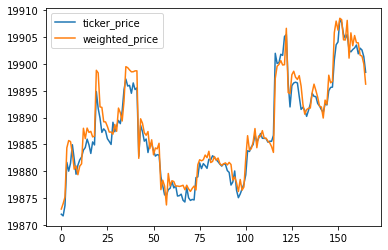

In [18]:
dat = pd.read_csv("order_weight_data.csv")
col = order_book_obj.columns
dat[[x for x in col if x in ['ticker_price', 'weighted_price']]].plot()

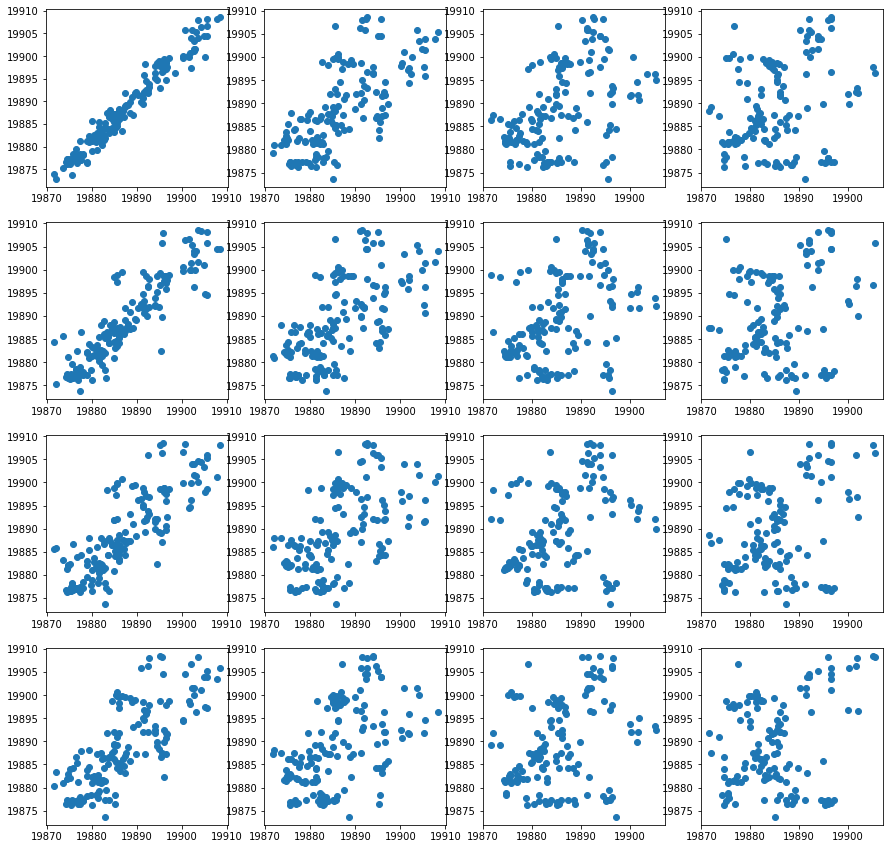

In [20]:
raw = dat[[x for x in col if x in ['ticker_price', 'weighted_price']]].values
rows = raw.shape[0]
figs, axs = plt.subplots(4,4,figsize=(15,15))
lag = 0
for j in range(4):
    for i in range(4):
        axs[i,j].scatter(raw[:(rows-lag),0],raw[lag:,1])
        lag += 2


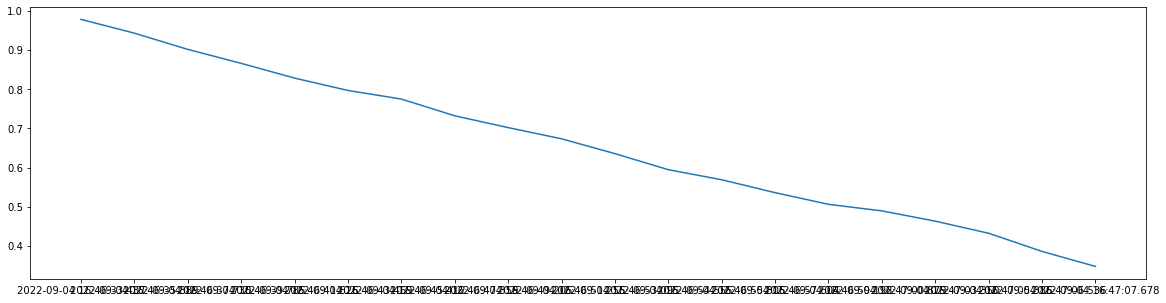

In [26]:
n = 20
lag_corr = np.zeros(shape=(n,))
lag = 0
time = dat['time0'].values
for i in range(n):
    lag_corr[i] = np.corrcoef(raw[:(rows-lag),0],raw[lag:,1])[0,1]
    lag += 1
plt.figure(figsize=(20,5))
plt.plot(time[:n],lag_corr)


In [25]:
time

array([['2022-09-04 16:46:33.437'],
       ['2022-09-04 16:46:35.889'],
       ['2022-09-04 16:46:37.730'],
       ['2022-09-04 16:46:39.785'],
       ['2022-09-04 16:46:41.626'],
       ['2022-09-04 16:46:43.469'],
       ['2022-09-04 16:46:45.412'],
       ['2022-09-04 16:46:47.359'],
       ['2022-09-04 16:46:49.205'],
       ['2022-09-04 16:46:51.255'],
       ['2022-09-04 16:46:53.095'],
       ['2022-09-04 16:46:54.555'],
       ['2022-09-04 16:46:55.805'],
       ['2022-09-04 16:46:57.604'],
       ['2022-09-04 16:46:59.192'],
       ['2022-09-04 16:47:00.879'],
       ['2022-09-04 16:47:03.350'],
       ['2022-09-04 16:47:05.386'],
       ['2022-09-04 16:47:06.536'],
       ['2022-09-04 16:47:07.678'],
       ['2022-09-04 16:47:09.273'],
       ['2022-09-04 16:47:10.911'],
       ['2022-09-04 16:47:12.573'],
       ['2022-09-04 16:47:14.596'],
       ['2022-09-04 16:47:16.444'],
       ['2022-09-04 16:47:18.912'],
       ['2022-09-04 16:47:20.741'],
       ['2022-09-04 16:47:22

<AxesSubplot:>

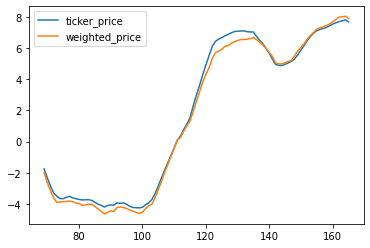

In [29]:
# let's say 
# 1. that the object accumulates the data 'dat' at a given time.
# 2. dat looks back time t
# 3. based on this trend it makes a decision to buy or sell now.
(dat[[x for x in col if x in ['ticker_price', 'weighted_price']]].rolling(window=50).mean()).diff(20).plot()